<a href="https://colab.research.google.com/github/casjunior93/Projeto-Tera-IA---Previsao-de-obitos-por-covid-considerando-doencas-pre-existentes/blob/main/Covid_e_doen%C3%A7as_pr%C3%A9_existentes_em_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Habilitando o acesso ao Google Drive no Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Bibliotecas fundamentais

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

# Roteiro do Projeto

O livro [Mãos à Obra: Aprendizado de Máquina com Scikit-Learn, Keras & TensorFlow](https://www.oreilly.com/library/view/maos-a-obra/9788550803814/) traz uma sugestão de roteiro para orientar um projeto de aprendizado de máquina. Os passos gerais são:

1.   Abordar o problema e analisar o panorama em geral
2.   Obter os dados
3.   Explorar os dados para obter informações úteis
4.   Preparar os dados para expor melhor os padrões de dados subjacentes aos algoritmos de aprendizado de máquina.
5.   Explorar modelos diferentes e selecionar os melhores.
6.   Aperfeiçoar os modelos e os combinar em uma solução ideal.
7.   Apresentar a solução.
8.   Implementar, monitorar e fazer a manutenção de seu sistema.



# Passo 1: Abordar o problema e analisar o panorama em geral

A COVID-19 é uma doença causada pelo coronavírus SARS-CoV-2. Seus principais sintomas são febre, cansaço e tosse seca. [(1)](https://www.paho.org/pt/covid19) O crescimento rápido de casos e óbitos por COVID-19 causou uma grande sobrecarga do sistema de saúde no Brasil. [(2)](http://cadernos.ensp.fiocruz.br/csp/artigo/1451/mortalidade-por-covid-19-padronizada-por-idade-nas-capitais-das-diferentes-regioes-do-brasil) Várias cidades brasileiras sofreram com a falta de leitos de UTI para casos graves de COVID-19, o que trouxe um dado alarmante: em 2021, 38% das mortes por covid ocorreram por falta de atendimento médico. [(3)](https://oglobo.globo.com/brasil/em-2021-38-dos-mortos-por-covid-em-hospitais-nao-chegaram-uti-1-24944189)

O objetivo desse modelo é prever se uma pessoa pode vir a óbito por covid-19 levando em consideração as doenças pré-existentes desta. Este modelo poderia ser útil para fazer a triagem de pacientes e o gerenciamento de leitos. Além disso, pode ser uma boa ferramenta para a prevenção de casos graves de COVID-19, gerando recomendações de vacinação, por exemplo, tendo em vista as diversas variantes do vírus que estão aparecendo e ao relaxamento das medidas de isolamento.

# Passo 2: Obter os dados

Os dados utilizados são referentes à população do estado de São Paulo e serão obtidos através da página [do site](https://www.seade.gov.br/coronavirus/) da Fundação SEADE - Sistema Estadual de Análise de Dados. Eles foram obtidos no dia 20 de julho de 2022 e apresentam dados recolhidos de 04 de fevereiro de 2020 até o dia 18 de julho de 2022.

Dicionário: https://github.com/seade-R/dados-covid-sp#dicion%C3%A1rio-para-o-arquivo-de-casos-%C3%B3bitos-e-doen%C3%A7as-pr%C3%A9-existentes

Dados: https://raw.githubusercontent.com/seade-R/dados-covid-sp/master/data/casos_obitos_doencas_preexistentes.csv.zip

## Dicionário

`codigo_ibge`	Código do município no IBGE (7 dígitos) de residência do paciente

`nome_munic`	Nome do município de residência do paciente

`idade`	Idade do paciente

`cs_sexo`	Sexo do paciente

`diagnostico_covid19`	Confirmação de COVID-19

`data_inicio_sintomas`	Data de início dos sintomas

`obito`	Indica se o paciente veio a óbito por COVID-19

`asma`	Paciente apresenta esse fator de risco (asma)

`cardiopatia`	Paciente apresenta esse fator de risco (cardiopatia)

`diabetes`	Paciente apresenta esse fator de risco (diabetes)

`doenca_hematologica`	Paciente apresenta esse fator de risco (doença hematológica)

`doenca_hepatica`	Paciente apresenta esse fator de risco (doença hepática)

`doenca_neurologica`	Paciente apresenta esse fator de risco (doença neurológica)

`doenca_renal`	Paciente apresenta esse fator de risco (doença renal)

`imunodepressao`	Paciente apresenta esse fator de risco (imunodepressão)

`obesidade`	Paciente apresenta esse fator de risco (obesidade)

`outros_fatores_de_risco`	Paciente apresenta outros fatores de risco

`pneumopatia`	Paciente apresenta esse fator de risco (pneumopatia)

`puerpera`	Paciente se encontra nesse estágio (puérpera)

`sindrome_de_down`	Paciente apresenta esse fator de risco (síndrome de down)

## Importação dos dados

In [3]:
%%time
df_completo = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes.csv',
                          sep=';', encoding='utf-8', parse_dates=['data_inicio_sintomas'])

CPU times: user 43.2 s, sys: 6.1 s, total: 49.3 s
Wall time: 57.5 s


In [4]:
df_completo.head(5)

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,Santa Cruz do Rio Pardo,3546405,42.00,MASCULINO,CONFIRMADO,2022-01-23 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
1,Santa Cruz do Rio Pardo,3546405,26.00,FEMININO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
2,Santa Cruz do Rio Pardo,3546405,51.00,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,IGNORADO,SIM,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
3,Santa Cruz do Rio Pardo,3546405,57.00,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
4,Santa Cruz do Rio Pardo,3546405,25.00,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


In [5]:
df_completo.shape

(5852960, 20)

Os registros com valores 'IGNORADO' correspondem a dados que não foram informados.

Dataframe sem os dados com os campos com valor 'IGNORADO':

In [6]:
%%time
colunas = df_completo.columns
df_sem_ignorados = df_completo.copy()

for c in colunas:
  df_sem_ignorados.drop(df_sem_ignorados.loc[df_sem_ignorados[c]=='IGNORADO'].index, inplace=True)

df_sem_ignorados.shape


CPU times: user 16.2 s, sys: 1.83 s, total: 18.1 s
Wall time: 17.7 s


Salvando registros completos em csv:

In [7]:
import os  
os.makedirs('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid', exist_ok=True)  
df_sem_ignorados.to_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes_sem_ignorados.csv') 

In [8]:
df_sem_ignorados.head()

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
7,Santa Cruz do Rio Pardo,3546405,68.00,FEMININO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,NÃO,SIM,SIM,NÃO,NÃO,NÃO,SIM,NÃO,NÃO,SIM,NÃO,NÃO,NÃO
28,Santa Cruz do Rio Pardo,3546405,77.00,FEMININO,CONFIRMADO,2022-01-18 00:00:00+00:00,1,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
31,Santa Bárbara d'Oeste,3545803,22.00,MASCULINO,CONFIRMADO,2020-10-22 00:00:00+00:00,0,NÃO,SIM,SIM,NÃO,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO
91,Santa Cruz do Rio Pardo,3546405,71.00,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,0,NÃO,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,SIM,NÃO,NÃO
93,Santa Cruz do Rio Pardo,3546405,102.00,MASCULINO,CONFIRMADO,2022-01-24 00:00:00+00:00,1,NÃO,SIM,SIM,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO,NÃO


In [9]:
print(f'Nosso conjunto de dados tem {df_sem_ignorados.shape[0]} registros.')

Nosso conjunto de dados tem 185800 registros.


# Passo3: Explorar os dados para obter informações úteis

In [10]:
#df = pd.read_csv('/content/drive/MyDrive/ANÁLISES DE DADOS/Covid/casos_obitos_doencas_preexistentes_sem_ignorados.csv', sep=',')
df = df_completo

## Análise descritiva

In [11]:
%%time
df.describe(include='all')

CPU times: user 11.8 s, sys: 76 ms, total: 11.9 s
Wall time: 11.9 s


,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
count,5852960,5852960.00,5702058.00,5852959,5852960,5678115,5852960.00,5852960,5852960,5852960,5852960,5852960,5852960,5852960,5852960,5852960,5852960,5852960,5852960,5852960
unique,646,NaN,NaN,4,1,896,NaN,3,3,3,3,3,3,3,3,3,3,3,3,3
top,São Paulo,NaN,NaN,FEMININO,CONFIRMADO,2022-01-10 00:00:00+00:00,NaN,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO
freq,1098422,NaN,NaN,3163499,5852960,37172,NaN,5635971,5332172,5438090,5639374,5640104,5633508,5624350,5615602,5628820,5592614,5633961,5641449,5639787
first,NaN,NaN,NaN,NaN,NaN,2020-02-04 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-07-18 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3533289.47,40.72,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,17490.41,18.14,NaN,NaN,NaN,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,3500105.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3518107.00,28.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Informações obtidas através do método describe():

* O conjunto tem 5.852.960 regitros.
* Houve mais casos de COVID-19 confirmados na cidade de São Paulo.
* As mulheres são a maioria dos casos.
* A média de óbitos dá uma indicação de que a maioria das pessoas da amostra não morreram.

Vou verificar a idade máxima de 2188 anos. Com certeza é um erro.

In [12]:
df.shape

(5852960, 20)

In [13]:
df.loc[df['idade'] == 2188]

,nome_munic,codigo_ibge,idade,cs_sexo,diagnostico_covid19,data_inicio_sintomas,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
3194160,Assis,3504008,2188.00,MASCULINO,CONFIRMADO,NaT,0,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO,IGNORADO


Vou excluir esse dado.

In [14]:
indexes = df[ df['idade'] == 2188 ].index
df.drop(indexes , inplace=True)

In [15]:
df.shape

(5852959, 20)

## Tipo dos dados

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5852959 entries, 0 to 5852959
Data columns (total 20 columns):
 #   Column                   Dtype              
---  ------                   -----              
 0   nome_munic               object             
 1   codigo_ibge              int64              
 2   idade                    float64            
 3   cs_sexo                  object             
 4   diagnostico_covid19      object             
 5   data_inicio_sintomas     datetime64[ns, UTC]
 6   obito                    int64              
 7   asma                     object             
 8   cardiopatia              object             
 9   diabetes                 object             
 10  doenca_hematologica      object             
 11  doenca_hepatica          object             
 12  doenca_neurologica       object             
 13  doenca_renal             object             
 14  imunodepressao           object             
 15  obesidade                object 

## Idade

### Visualização da feature idade

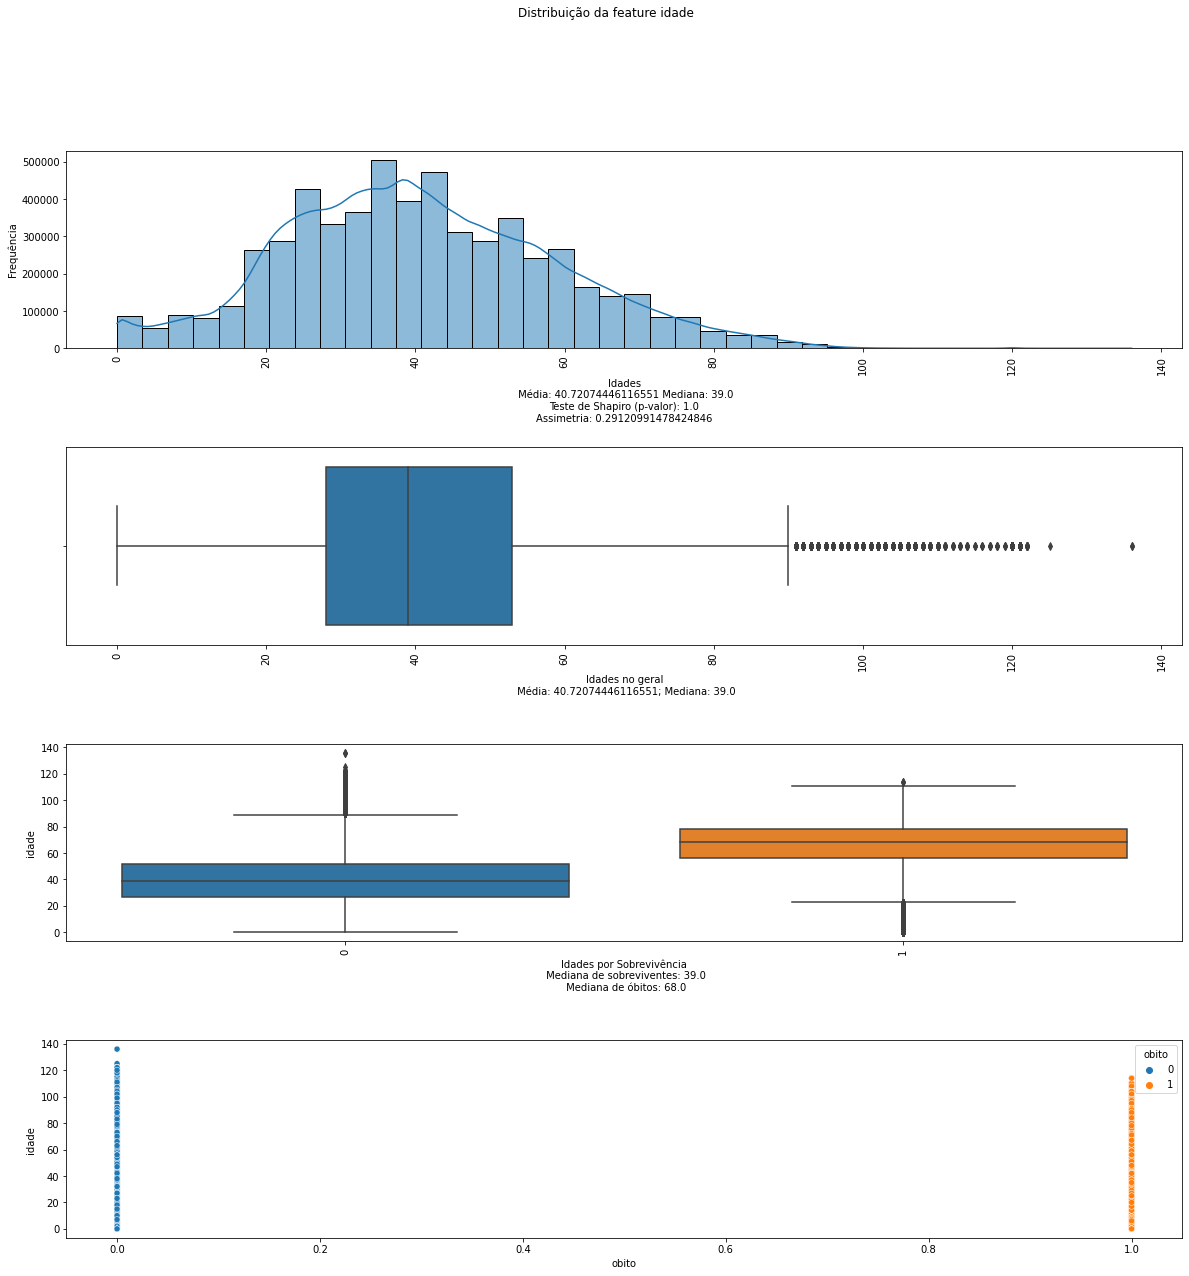

CPU times: user 3min 6s, sys: 19.8 s, total: 3min 26s
Wall time: 3min 10s


In [17]:
%%time
import scipy.stats as stats
stat,p = stats.shapiro(df['idade'].to_numpy())

fig, axes = plt.subplots(4, 1, figsize = (20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição da feature idade')

#Idade
sns.histplot(ax=axes[0],x=df['idade'], kde=True, bins=40)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Idades\n Média: ' + str(df['idade'].mean()) + ' Mediana: ' + str(df['idade'].median()) + '\nTeste de Shapiro (p-valor): ' 
            + str(p) + '\nAssimetria: ' + str(df.idade.skew()), ylabel='Frequência')

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Idades no geral\n Média: ' + str(df['idade'].mean()) + '; Mediana: ' + str(df['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[2],x=df['obito'], y=df['idade'])
axes[2].tick_params(axis='x', rotation=90)
axes[2].set(xlabel='Idades por Sobrevivência\n Mediana de sobreviventes: ' + str(df.loc[df['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df.loc[df['obito'] == 1]['idade'].median()))

#Idade vs Óbito
sns.scatterplot(ax=axes[3], data=df, x="obito", y="idade", hue="obito")

plt.show();

* Há outliers acima de 90 anos muito estranhos.

Como há dados de idade muito fora do normal, como 140 anos, e outliers acima de 90 anos, vou verificar se posso considerar somente dados abaixo ou igual à 100 anos.

In [18]:
total_casos_maior_100 = df[ df['idade'] > 100].shape[0]
total_registros = df.shape[0]
porcentagem = (total_casos_maior_100/total_registros) * 100
print(f'{porcentagem}%')

0.027097404919460395%


Como representam apenas 0.027% dos dados, vou excluir registros com mais de 100 anos.

In [19]:
df.shape

(5852959, 20)

In [20]:
indexes2 = df[ df['idade'] > 100].index
df.drop(indexes2 , inplace=True)

In [21]:
df.shape

(5851373, 20)

Refazendo os gráficos:

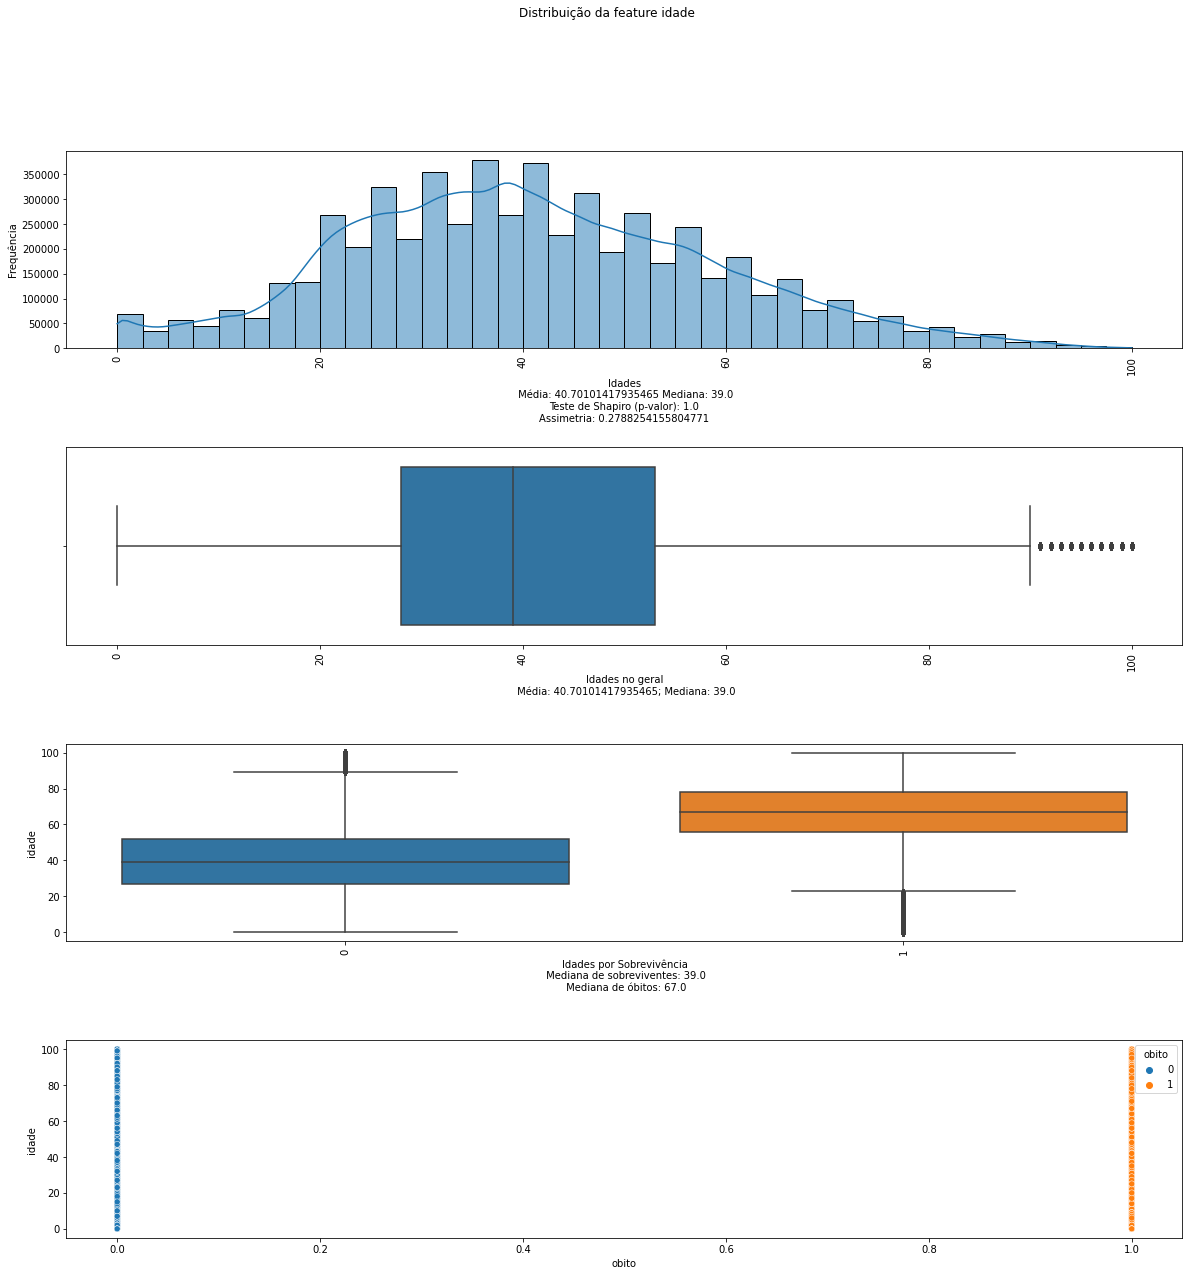

CPU times: user 3min 7s, sys: 19.4 s, total: 3min 26s
Wall time: 3min 9s


In [22]:
%%time
import scipy.stats as stats
stat,p = stats.shapiro(df['idade'].to_numpy())

fig, axes = plt.subplots(4, 1, figsize = (20,20))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição da feature idade')

#Idade
sns.histplot(ax=axes[0],x=df['idade'], kde=True, bins=40)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Idades\n Média: ' + str(df['idade'].mean()) + ' Mediana: ' + str(df['idade'].median()) + '\nTeste de Shapiro (p-valor): ' 
            + str(p) + '\nAssimetria: ' + str(df.idade.skew()), ylabel='Frequência')

#Idade - Boxplot
sns.boxplot(ax=axes[1],x=df['idade'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Idades no geral\n Média: ' + str(df['idade'].mean()) + '; Mediana: ' + str(df['idade'].median()))

#Idade - Boxplot
sns.boxplot(ax=axes[2],x=df['obito'], y=df['idade'])
axes[2].tick_params(axis='x', rotation=90)
axes[2].set(xlabel='Idades por Sobrevivência\n Mediana de sobreviventes: ' + str(df.loc[df['obito'] == 0]['idade'].median()) + '\n Mediana de óbitos: ' + str(df.loc[df['obito'] == 1]['idade'].median()))

#Idade vs Óbito
sns.scatterplot(ax=axes[3], data=df, x="obito", y="idade", hue="obito")

plt.show();

* A média das idades no geral é de aproximadamente 40 anos e a mediana é 39.
* O teste de Shapiro-Wilk indica que a distribuição é normal, pois p-value > 0.5.
* A assimetria positiva indica que existe uma maior concentração de valores na zona de idades mais baixas da amostra.
* Os boxplots indicam que o grupo de sobreviventes tem mediana de 39 anos, e o grupo de óbitos tem mediana de 67 anos, o que indica mortalidade maior em pessoas com maior idade.
* A dispersão dos dados indicam que os dados tem pouca variabilidade, tanto no grupos de sobreviventes quanto no de óbitos.

### Teste de hipótese sobre a feature

Como visto anteriormente, a feature idade tem distribuição normal.